<center><h1>Project 2</h1></center>
<center><h1>Classification Task</h1></center>


<h2>Pre-Process Data</h2>
<center><h2> Import Libraries and Setups </h2></center></p>


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from collections import defaultdict
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings('ignore')

<center><h2>Reading the dataset </h2></center></p>


In [4]:
data=pd.read_excel('IPEDS_data.xlsx')

In [5]:
data.head(20)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,-87.545766,33.214400,Not applicable,Implied no,...,20.0,18.0,4.0,3.0,50.0,42.0,41.0,8.0,19469.0,NaN
6,100812,Athens State University,2013,35611,Bachelor's degree,Limestone County,-86.965140,34.805625,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854.0,NaN
7,100830,Auburn University at Montgomery,2013,36117-3596,Doctor's degree - research/scholarship,Montgomery County,-86.177351,32.369939,Not applicable,Implied no,...,48.0,48.0,5.0,5.0,48.0,36.0,36.0,0.0,10736.0,NaN
8,100858,Auburn University,2013,36849,Doctor's degree - research/scholarship and pro...,Lee County,-85.492409,32.600201,Not applicable,Implied no,...,13.0,13.0,3.0,1.0,65.0,32.0,31.0,3.0,22092.0,NaN
9,100937,Birmingham Southern College,2013,35254,Bachelor's degree,Jefferson County,-86.853636,33.515453,United Methodist,Implied no,...,21.0,21.0,9.0,26.0,96.0,80.0,80.0,7.0,NaN,37598.0


In [6]:
data.dtypes

ID number                                                                              int64
Name                                                                                  object
year                                                                                   int64
ZIP code                                                                              object
Highest degree offered                                                                object
County name                                                                           object
Longitude location of institution                                                    float64
Latitude location of institution                                                     float64
Religious affiliation                                                                 object
Offers Less than one year certificate                                                 object
Offers One but less than two years certificate                        

<h2>Pre-Process Data and dropping the columns</h2>


In [7]:
data=data.drop(columns=['ID number','Name','year','ZIP code','County name','Longitude location of institution','Latitude location of institution'])

<h2>Fiiling the missing values</h2>


In [8]:
for i in data.columns:
    if data[i].dtype=='object' and i.find('Offers')!=-1:
        data[i]=data[i].fillna('Implied no')

In [9]:
data['Religious affiliation']=data['Religious affiliation'].fillna('Not applicable')

<h2>Using Imputer with mean for missing values</h2>


In [10]:
for i in data.columns:
  count=0
  avg=0
  if data[i].dtype=='float64':
      avg = data[i].fillna(0).sum()/len(data[i])
      data[i] = data[i].fillna(avg)

<h2>Using Label Encoder for object</h2>


In [11]:
for i in data.columns:
    if data[i].dtype=='object':
        le=LabelEncoder()
        data[i]=le.fit_transform(data[i])

<h2>Defining Target variable</h2>


In [12]:
y=data["Offers Associate's degree"].values
X=data.drop(columns="Offers Associate's degree").values

In [13]:
data.head()

,Highest degree offered,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,3,34,0,0,0,0,1,0,1,0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,3181.931551,40696.93807
1,4,34,0,1,0,1,1,1,1,1,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.000000,40696.93807
2,4,15,0,0,1,0,1,0,1,0,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,3181.931551,302.00000
3,4,34,1,0,0,0,1,1,1,1,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.000000,40696.93807
4,4,34,0,0,0,0,1,0,1,1,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.000000,40696.93807


# Boxplot


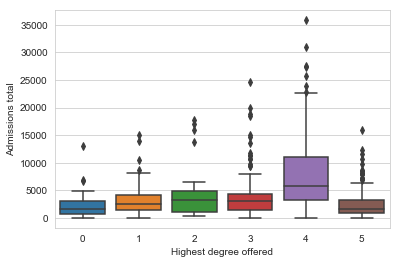

In [14]:
import seaborn as sns
sns.set_style("whitegrid") 
sns.boxplot(x = 'Highest degree offered', y = 'Admissions total', data = data)

# Splitting the data in train and test


In [15]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


## Using Standard scaler for Feature Scaling

In [16]:
sc=StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

## Hard And Soft Voting


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8229166666666666
KNeighborsClassifier 0.7291666666666666
SVC 0.75
VotingClassifier 0.7864583333333334


In [18]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8229166666666666
KNeighborsClassifier 0.7291666666666666
SVC 0.75
VotingClassifier 0.7994791666666666


## Bagging and Pasting

# Add GridSearch and CV for bagging and pasting both

# Bagging with SVM

In [19]:
model_bag_SVC=BaggingClassifier(base_estimator=SVC(kernel='poly',degree=2,C=100),n_estimators=25) 
model_bag_SVC.fit(X_train, y_train)
y_pred = model_bag_SVC.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6953125


In [20]:
from collections import defaultdict

In [21]:
tuned_parameters = [{'n_estimators':[20,24,25,30,35]}]

scores = ['precision', 'recall']

plot=defaultdict(int)

for score in scores:
    print('Scoring Parameter', score)
    print("# Tuning hyper-parameters for %s" % score)
    print()
    model_bag_SVC=BaggingClassifier(base_estimator=SVC(kernel='poly',degree=2,C=100))#,n_estimators=25)
    model = GridSearchCV(model_bag_SVC, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    yPred = model.predict(X_test)
    print(classification_report(y_test, yPred))
    # print(precision_score(y_test,yPred))
    # dic=dict(classification_report(y_test,yPred))
    # print(dic)
    print()

    print(model.cv_results_)
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(y_test, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(y_test, yPred))
    


    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    CM = confusion_matrix(y_test, yPred)
    print (CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

Scoring Parameter precision
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 24}

Grid scores on development set:

0.666 (+/-0.068) for {'n_estimators': 20}
0.689 (+/-0.050) for {'n_estimators': 24}
0.676 (+/-0.088) for {'n_estimators': 25}
0.665 (+/-0.039) for {'n_estimators': 30}
0.674 (+/-0.045) for {'n_estimators': 35}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       219
           1       0.66      0.61      0.63       165

    accuracy                           0.70       384
   macro avg       0.69      0.69      0.69       384
weighted avg       0.69      0.70      0.69       384


{'mean_fit_time': array([2.75203795, 3.30884333, 3.4780972 , 4.09292684, 4.86185102]), 'std_fit_time': array([0.03197244, 0.04300561, 0.18964812, 0.13712959, 0.07835304]), 'mean_score_time': array([0.49586763, 0.61063733, 0.61487722, 0.72180238, 0.85684447])

# Add GridSearch and CV

# Bagging with Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_bag_dt=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),n_estimators=25)

model_bag_dt.fit(X_train, y_train)
y_pred = model_bag_dt.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.953125


# Pasting with Decision Tree Classifier

In [23]:
tuned_parameters = [{'n_estimators':[20,24,25,30,35]}]

scores = ['precision', 'recall']

for score in scores:
    print('Scoring Parameter', score)
    print("# Tuning hyper-parameters for %s" % score)
    print()
    model_bag_SVC=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),bootstrap=False)#,n_estimators=25)
    model = GridSearchCV(model_bag_SVC, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    yPred = model.predict(X_test)
    print(classification_report(y_test, yPred))
    print()
    
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(y_test, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(y_test, yPred))
    
    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    CM = confusion_matrix(y_test, yPred)
    print (CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

Scoring Parameter precision
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 20}

Grid scores on development set:

0.922 (+/-0.023) for {'n_estimators': 20}
0.917 (+/-0.014) for {'n_estimators': 24}
0.915 (+/-0.032) for {'n_estimators': 25}
0.915 (+/-0.032) for {'n_estimators': 30}
0.915 (+/-0.027) for {'n_estimators': 35}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       219
           1       0.89      0.88      0.88       165

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.90       384


MSE
0.09895833333333333
ROC_AUC_Score
0.8982980489829806
Confusion Matrix
[[201  18]
 [ 20 145]]
Sensitivity: 0.8787878787878788
Specificity: 0.9178082191780822
Scoring Parameter recall
# Tuning hyper-parameters for recall

Best parameters set found on devel

# ADA Boost with Decision Tree Classifier

# Add GridSearch and CV

In [25]:
model_ada_DT=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=16),n_estimators=25,learning_rate=0.5,random_state=0)
model_ada_DT.fit(X_train, y_train)
y_pred = model_ada_DT.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8984375


In [26]:
tuned_parameters = [{'n_estimators':[20,24,25,30,35]}]

scores = ['precision', 'recall']

for score in scores:
    print('Scoring Parameter', score)
    print("# Tuning hyper-parameters for %s" % score)
    print()
    model_bag_SVC=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12),learning_rate=0.5,random_state=0)#,n_estimators=25)
    model = GridSearchCV(model_bag_SVC, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    yPred = model.predict(X_test)
    print(classification_report(y_test, yPred))
    print()
    
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(y_test, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(y_test, yPred))
    
    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    CM = confusion_matrix(y_test, yPred)
    print (CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

Scoring Parameter precision
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 20}

Grid scores on development set:

0.919 (+/-0.052) for {'n_estimators': 20}
0.918 (+/-0.049) for {'n_estimators': 24}
0.918 (+/-0.049) for {'n_estimators': 25}
0.916 (+/-0.045) for {'n_estimators': 30}
0.917 (+/-0.047) for {'n_estimators': 35}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       219
           1       0.97      0.91      0.94       165

    accuracy                           0.95       384
   macro avg       0.95      0.95      0.95       384
weighted avg       0.95      0.95      0.95       384


MSE
0.049479166666666664
ROC_AUC_Score
0.9454130344541304
Confusion Matrix
[[215   4]
 [ 15 150]]
Sensitivity: 0.9090909090909091
Specificity: 0.9817351598173516
Scoring Parameter recall
# Tuning hyper-parameters for recall

Best parameters set found on deve

# ADA Boost with SVC

In [27]:
model_ada_SVC=AdaBoostClassifier(base_estimator=SVC(kernel='poly', degree=2,C=100),n_estimators=25,algorithm='SAMME')
model_ada_SVC.fit(X_train, y_train)
y_pred = model_ada_SVC.predict(X_test)
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6067708333333334


In [30]:
tuned_parameters = [{'n_estimators':[20,24,25,30,35]}]

scores = ['precision', 'recall']

for score in scores:
    print('Scoring Parameter', score)
    print("# Tuning hyper-parameters for %s" % score)
    print()
    model_bag_SVC=AdaBoostClassifier(base_estimator=SVC(kernel='poly', degree=2,C=100),algorithm="SAMME",learning_rate=0.5,random_state=0)#,n_estimators=25)
    model = GridSearchCV(model_bag_SVC, tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    yPred = model.predict(X_test)
    print(classification_report(y_test, yPred))
    print()
    
    from sklearn.metrics import mean_squared_error
    print("MSE")
    print(mean_squared_error(y_test, yPred))
    
    from sklearn.metrics import roc_auc_score
    print("ROC_AUC_Score")
    print(roc_auc_score(y_test, yPred))
    
    from sklearn.metrics import confusion_matrix
    print('Confusion Matrix') 
    CM = confusion_matrix(y_test, yPred)
    print (CM)
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    sensitivity = TP/(TP+FN)
    print('Sensitivity:' ,sensitivity)
    specificity = TN/(TN+FP)
    print('Specificity:' ,specificity)
        

Scoring Parameter precision
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_estimators': 25}

Grid scores on development set:

0.675 (+/-0.055) for {'n_estimators': 20}
0.671 (+/-0.054) for {'n_estimators': 24}
0.676 (+/-0.060) for {'n_estimators': 25}
0.675 (+/-0.057) for {'n_estimators': 30}
0.675 (+/-0.060) for {'n_estimators': 35}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       219
           1       0.62      0.67      0.65       165

    accuracy                           0.68       384
   macro avg       0.68      0.68      0.68       384
weighted avg       0.69      0.68      0.68       384


MSE
0.3177083333333333
ROC_AUC_Score
0.681112494811125
Confusion Matrix
[[151  68]
 [ 54 111]]
Sensitivity: 0.6727272727272727
Specificity: 0.6894977168949772
Scoring Parameter recall
# Tuning hyper-parameters for recall

Best parameters set found on develop

# Gradient Boosting Classifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))



gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.982
Accuracy on test set: 0.953
Accuracy on training set: 0.956
Accuracy on test set: 0.953
Accuracy on training set: 0.955
Accuracy on test set: 0.953


## Neural Network

In [18]:
##### DEEP NEURAL NETWORKSfrom dklrstn
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (1150, 137)
Test matrix shape (384, 137)


In [19]:
# step 1: make the model - no hidden layer
model = Sequential()
#input layer: input)_dim: number of columns in X_train 
model.add(Dense(100, input_dim = X_train.shape[1] , activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
#hidden layers
#output
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1,activation="sigmoid"))

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
# step 2: compile the model -> create the computational graph
model.compile(loss='binary_crossentropy' , optimizer='adam' , metrics = ['accuracy'])

In [21]:
# step 3: train the model: fit epochs and batch_size
model.fit(X_train, y_train, epochs = 100 , batch_size =120, validation_data=(X_test,y_test))

Train on 1150 samples, validate on 384 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1150/1150 [==============================] - 1s 686us/sample - loss: 0.6883 - acc: 0.5817 - val_loss: 0.6281 - val_acc: 0.7005
Epoch 2/100
1150/1150 [==============================] - 0s 44us/sample - loss: 0.6024 - acc: 0.6817 - val_loss: 0.5807 - val_acc: 0.7109
Epoch 3/100
1150/1150 [==============================] - 0s 39us/sample - loss: 0.5470 - acc: 0.7339 - val_loss: 0.5340 - val_acc: 0.7526
Epoch 4/100
1150/1150 [==============================] - 0s 42us/sample - loss: 0.4943 - acc: 0.7600 - val_loss: 0.5157 - val_acc: 0.7526
Epoch 5/100
1150/1150 [==============================] - 0s 36us/sample - loss: 0.4545 - acc: 0.7887 - val_loss: 0.5004 - val_acc: 0.7422
Epoch 6/100
1150/1150 [==============================] - 0s 36us/sample - loss: 0.4148 - acc: 0.8139 - val_loss: 0.4943 - val_acc: 0.7396
Epoch 7/100
1150/1150 [==============================] - 0s 36us/sample - lo

In [22]:
#model evaluate
model.evaluate(X_test,y_test,verbose=2)                                                                                                             

 - 0s - loss: 1.5242 - acc: 0.7578


[1.524237831433614, 0.7578125]

## PCA

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components = 0.90)
pca.fit(X_train)
xTrain=pca.transform(X_train)
xTest = pca.transform(X_test)

In [31]:
pca.explained_variance_ratio_.sum()

0.9021893405693255

# Models

## SVM

In [34]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 25, 50]},
                    {'kernel': ['poly'], 'gamma': [1e-3, 1e-4], 'degree': [2,3,4,5],'C': [1, 20, 50]},
                    {'kernel': ['linear'], 'C': [1, 25, 50]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(SVC(), tuned_parameters, cv=5, n_jobs=-1,
                       scoring='%s_macro' % score)
    model.fit(xTrain, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    
#     y_true, y_pred = y_test, clf.predict(X_test)
    y_pred=model.predict(xTest)
    print(model.score(xTrain,y_train))
    print(accuracy_score(y_test, y_pred))   
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.729 (+/-0.058) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.692 (+/-0.402) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.764 (+/-0.026) for {'C': 25, 'gamma': 0.001, 'kernel': 'rbf'}
0.739 (+/-0.079) for {'C': 25, 'gamma': 0.0001, 'kernel': 'rbf'}
0.765 (+/-0.026) for {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
0.755 (+/-0.056) for {'C': 50, 'gamma': 0.0001, 'kernel': 'rbf'}
0.490 (+/-0.492) for {'C': 1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'}
0.290 (+/-0.001) for {'C': 1, 'degree': 2, 'gamma': 0.0001, 'kernel': 'poly'}
0.490 (+/-0.492) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}
0.290 (+/-0.001) for {'C': 1, 'degree': 3, 'gamma': 0.0001, 'kernel': 'poly'}
0.490 (+/-0.492) for {'C': 1, 'degree': 4, 'gamma': 0.001, 'kernel': 'poly'}
0.290 (+/-0.001) for {'C': 1, 'degree': 4, 'gamma': 0.0001, 'ke

## KNNeighborsClassifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'n_neighbors':[1,2,3,4,5]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(xTrain, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    y_pred = model.predict(xTest)
    print(model.score(xTrain,y_train))
    print(accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print()
    print("AUC_Score")
    print(roc_auc_score(y_test, y_pred))
    

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'n_neighbors': 2}

Grid scores on development set:

0.665 (+/-0.044) for {'n_neighbors': 1}
0.701 (+/-0.088) for {'n_neighbors': 2}
0.669 (+/-0.037) for {'n_neighbors': 3}
0.683 (+/-0.078) for {'n_neighbors': 4}
0.665 (+/-0.054) for {'n_neighbors': 5}

Detailed classification report:
0.8827586206896552
0.671875
              precision    recall  f1-score   support

           0       0.66      0.87      0.75       220
           1       0.70      0.40      0.51       164

   micro avg       0.67      0.67      0.67       384
   macro avg       0.68      0.64      0.63       384
weighted avg       0.68      0.67      0.65       384

[[192  28]
 [ 98  66]]

AUC_Score
0.6375831485587583
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'n_neighbors': 3}

Grid scores on development set:

0.661 (+/-0.044) for {'n_neighbors': 1}
0.638 (+/-0.063) for {'n_neighbors': 2}


## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
tuned_parameters = [{'penalty':['l1', 'l2']}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(xTrain, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    y_pred = model.predict(xTest)
    print(model.score(xTrain,y_train))
    print(accuracy_score(y_test, y_pred))
    
    
    print(classification_report(y_test, y_pred))
    print()
    print("AUC_Score")
    print(roc_auc_score(y_test, y_pred))

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'penalty': 'l1'}

Grid scores on development set:

0.761 (+/-0.028) for {'penalty': 'l1'}
0.759 (+/-0.016) for {'penalty': 'l2'}

Detailed classification report:
0.7837798694185764
0.765625
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       220
           1       0.76      0.66      0.71       164

   micro avg       0.77      0.77      0.77       384
   macro avg       0.76      0.75      0.76       384
weighted avg       0.76      0.77      0.76       384


AUC_Score
0.7527716186252772
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'penalty': 'l1'}

Grid scores on development set:

0.744 (+/-0.014) for {'penalty': 'l1'}
0.744 (+/-0.017) for {'penalty': 'l2'}

Detailed classification report:
0.7644162757799121
0.765625
              precision    recall  f1-score   support

           0       0.77      0.84

In [44]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(xTrain, y_train)
    log_l2.fit(xTrain, y_train)
    train_score_l1.append(log_l1.score(xTrain, y_train))
    train_score_l2.append(log_l2.score(xTrain, y_train))
    test_score_l1.append(log_l1.score(xTest, y_test))
    test_score_l2.append(log_l2.score(xTest, y_test))

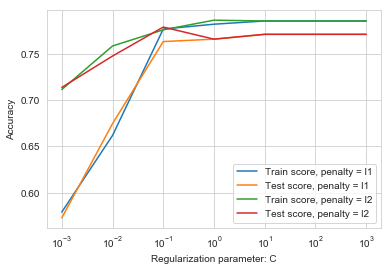

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
tuned_parameters = [{'max_depth':[10,12,13,14]}] ###3 change these parameters as per need

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    model = GridSearchCV(DecisionTreeClassifier(criterion='entropy'), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    model.fit(xTrain, y_train)

    print("Best parameters set found on development set:")
    print()
    print(model.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

    print("Detailed classification report:")
   
    y_pred = model.predict(xTest)
    print(model.score(xTrain,y_train))
    print(accuracy_score(y_test, y_pred))
    
    
    print(classification_report(y_test, y_pred))
    print()
    print("AUC_Score")
    print(roc_auc_score(y_test, y_pred))

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'max_depth': 13}

Grid scores on development set:

0.590 (+/-0.038) for {'max_depth': 10}
0.591 (+/-0.055) for {'max_depth': 12}
0.591 (+/-0.054) for {'max_depth': 13}
0.587 (+/-0.034) for {'max_depth': 14}

Detailed classification report:
0.9904807620377528
0.6302083333333334
              precision    recall  f1-score   support

           0       0.67      0.70      0.69       220
           1       0.57      0.53      0.55       164

   micro avg       0.63      0.63      0.63       384
   macro avg       0.62      0.62      0.62       384
weighted avg       0.63      0.63      0.63       384


AUC_Score
0.6175166297117517
# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'max_depth': 12}

Grid scores on development set:

0.587 (+/-0.061) for {'max_depth': 10}
0.593 (+/-0.050) for {'max_depth': 12}
0.587 (+/-0.059) for {'max_depth': 13}
0.584 (+/-0.055) for {

## Random Forest Classifier


In [52]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(xTrain, y_train)

#Predicting the Test set results
y_pred = model.predict(xTest)
print(model.score(xTrain,y_train))
print(accuracy_score(y_test, y_pred))
    
    
print(classification_report(y_test, y_pred))
print()
print("AUC_Score")
print(roc_auc_score(y_test, y_pred))

0.975501327774055
0.6380208333333334
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       220
           1       0.58      0.57      0.57       164

   micro avg       0.64      0.64      0.64       384
   macro avg       0.63      0.63      0.63       384
weighted avg       0.64      0.64      0.64       384


AUC_Score
0.628991130820399


## Linear SVC

In [54]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(xTrain, y_train)
print("Accuracy on training set: {:.3f}".format(linear_svm.score(xTrain, y_train)))
print("Accuracy on test set: {:.3f}".format(linear_svm.score(xTest, y_test)))
print("Detailed classification report:")
print()
y_pred = model.predict(xTest)
print(model.score(xTrain,y_train))
print(accuracy_score(y_test, y_pred))
    
    
print(classification_report(y_test, y_pred))
print()
print("AUC_Score")
print(roc_auc_score(y_test, y_pred))


Accuracy on training set: 0.784
Accuracy on test set: 0.768
Detailed classification report:

0.975501327774055
0.6380208333333334
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       220
           1       0.58      0.57      0.57       164

   micro avg       0.64      0.64      0.64       384
   macro avg       0.63      0.63      0.63       384
weighted avg       0.64      0.64      0.64       384


AUC_Score
0.628991130820399


In [56]:
from sklearn.svm import LinearSVC

c_range = [0.001, 0.01, 0.1, 1, 10, 100,1000]
train_score_linearsvc_l1 = []
train_score_linearsvc_l2 = []
test_score_linearsvc_l1 = []
test_score_linearsvc_l2 = []

for c in c_range:
    #log_l1 = LinearSVC(penalty = 'l1', C = c)
    log_l2 = LinearSVC(penalty = 'l2', C = c)
    #log_l1.fit(xTrain, yTrain)
    log_l2.fit(xTrain, y_train)
   # train_score_linearsvc_l1.append(log_l1.score(xTrain, yTrain))
    train_score_linearsvc_l2.append(log_l2.score(xTrain, y_train))
    #test_score_linearsvc_l1.append(log_l1.score(xTest, yTest))
    test_score_linearsvc_l2.append(log_l2.score(xTest, y_test))

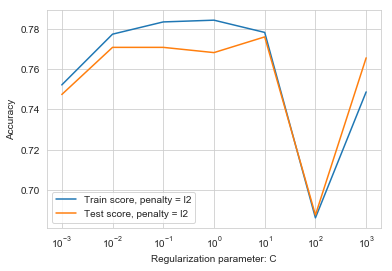

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.plot(c_range, train_score_linearsvc_l1, label = 'Train score, penalty = l1')
# plt.plot(c_range, test_score_linearsvc_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_linearsvc_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_linearsvc_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### After applying PCA, the above models doesn't give better results as evident from the respective accuracy score 

## Summary:

## SVM                   
### Accuracy on test set for linear kernel with C= 50:  0.9114583333333334

## KNN
### Accuracy on test set for 3 nearest neighbours:0.7161458333333334, AUC_Score: 0.4834821428571428

## Logistic Regression
### Accuracy on test set: 0.8385416666666666, AUC_Score: 0.5077050997782706

## Linear SVC
###  Accuracy on test set: 0.576, MSE: 0.4244791666666667, AUC_Score: 0.5077050997782706


## Random Forest
### Accuracy on test set: 0.9192708333333334; AUC_Score: 0.4834821428571428

## Decision Tree
### Accuracy on test set for maximum depth = 10: 0.9192708333333334,  AUC_Score: 0.4834821428571428